In [1]:
from nltk.corpus import wordnet
import pandas as pd
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 300)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#NLP packages
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

In [2]:
from wordcloud import WordCloud

def wc(data,bgcolor,title):
    plt.figure(figsize = (50,50))
    wc = WordCloud(background_color = bgcolor, max_words = 2000, random_state=42, max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [3]:
#data = pd.read_csv('../input/loghub-ssh-log-data/SSH.log', sep='\n', names = ['Log_contents'])
#data = pd.read_csv('../input/windows-event-log/eventlog.csv', sep = '\n', names = ['Log_contents'])
#data = pd.read_csv('../input/loghub-apache-log-data/Apache.log', sep = '\n', names = ['Log_contents'])
data = pd.read_csv('../Test/Android.log', sep = '\n', names = ['Log_contents'])
data.head()

,Log_contents
0,12-17 19:31:36.263 1795 1825 I PowerManager_screenOn: DisplayPowerStatesetColorFadeLevel: level=1.0
1,"12-17 19:31:36.263 5224 5283 I SendBroadcastPermission: action:android.com.huawei.bone.NOTIFY_SPORT_DATA, mPermissionType:0"
2,"12-17 19:31:36.264 1795 1825 D DisplayPowerController: Animating brightness: target=21, rate=40"
3,"12-17 19:31:36.264 1795 1825 I PowerManager_screenOn: DisplayPowerController updatePowerState mPendingRequestLocked=policy=BRIGHT, useProximitySensor=true, useProximitySensorbyPhone=true, screenBrightness=33, screenAutoBrightnessAdjustment=0.0, brightnessSetByUser=true, useAutoBrightness=true,..."
4,"12-17 19:31:36.264 1795 2750 I PowerManager_screenOn: DisplayPowerState Updating screen state: state=ON, backlight=823"


In [4]:
print(data.shape)
data = data.sample(10000)
print(data.shape)

(1555005, 1)
(10000, 1)


In [5]:
#Calculating the Sentiment Polarity
polarity=[] # list which will contain the polarity of the comments
subjectivity=[] # list which will contain the subjectivity of the comments
for i in data['Log_contents'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [6]:
data.head()

,Log_contents
1304674,12-18 15:51:04.224 633 31870 I SDK : <2016-12-18 15:51:04> [WARN] SDK: UE-SeC 2016-12-18 15:51:4:224 Level[WARN] magic[3362781472 684]:PubEvt_Close Getting a socket[109] from the Socket-table Failed!
392656,12-17 21:54:58.804 1795 1825 I WindowManger_keyguard: Screen turned off...
623942,12-17 23:46:09.365 633 31870 I SDK :
408806,12-17 21:58:52.749 633 31875 E SDK :
1443118,12-18 18:31:58.062 1795 1795 V NotificationService: disableEffects=null canInterrupt=false once update: false


In [7]:
def syn(word):
    synonyms = []
    antonyms = []

    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
            if l.antonyms():
                antonyms.append(l.antonyms()[0].name())

    print("Synonyms: " + str(set(synonyms)))
    print("Antonyms: " + str(set(antonyms)))

In [8]:
#Adding the Sentiment Polarity column to the data
data['polarity']=polarity
data['subjectivity']=subjectivity

In [9]:
data.head()

,Log_contents,polarity,subjectivity
1304674,12-18 15:51:04.224 633 31870 I SDK : <2016-12-18 15:51:04> [WARN] SDK: UE-SeC 2016-12-18 15:51:4:224 Level[WARN] magic[3362781472 684]:PubEvt_Close Getting a socket[109] from the Socket-table Failed!,-0.625,0.3
392656,12-17 21:54:58.804 1795 1825 I WindowManger_keyguard: Screen turned off...,0.000,0.0
623942,12-17 23:46:09.365 633 31870 I SDK :,0.000,0.0
408806,12-17 21:58:52.749 633 31875 E SDK :,0.000,0.0
1443118,12-18 18:31:58.062 1795 1795 V NotificationService: disableEffects=null canInterrupt=false once update: false,-0.400,0.6


In [10]:
data.to_csv('windows_logs_sentiment.csv')

In [11]:
#Displaying the POSITIVE comments
data[data.polarity>0].head(10)

,Log_contents,polarity,subjectivity
652530,12-18 00:04:57.868 2852 2852 E BokehDrawable: BlurBitmap draw super 0.0,0.333333,0.666667
239798,12-17 21:13:18.105 3879 4071 I HwLauncher: Launcher.Utilities unread scaledHeight = 55;sBigIconSize = 175,0.100000,0.400000
15067,12-17 19:32:23.786 5215 5215 D wpa_supplicant: wlan0: BSS: Add new id 494 BSSID 80:38:bc:0a:f0:c1 SSID 'Huawei-Employee' freq 2452,0.136364,0.454545
1398046,12-18 17:56:16.295 2852 2852 W KG_FP.Utils: Fast TurnonScreen start,0.200000,0.600000
359522,12-17 21:50:28.687 1795 3957 E IzatSvc_OSObserver: I/LocTech-Value :: Data Item Value: IS_SCREEN_ON: true,0.350000,0.650000
373659,12-17 21:51:49.988 3608 3608 D HwCust : Create obj success use class android.app.HwCustNotificationImpl,0.300000,0.000000
987507,12-18 10:55:52.540 1795 1825 D DisplayPowerController: Display ready!,0.250000,0.500000
12079,12-17 19:32:01.433 1795 2750 D PowerManagerService: Setting HAL auto-suspend mode to true,0.350000,0.650000
1430129,12-18 18:27:52.067 2852 2852 D HwCust : Create obj success use class android.app.HwCustNotificationImpl,0.300000,0.000000
1344878,12-18 17:32:25.163 2852 2852 D HwCust : Create obj success use class android.app.HwCustNotificationImpl,0.300000,0.000000


In [12]:
#Displaying the NEGATIVE comments
data[data.polarity<0].head(10)

,Log_contents,polarity,subjectivity
1304674,12-18 15:51:04.224 633 31870 I SDK : <2016-12-18 15:51:04> [WARN] SDK: UE-SeC 2016-12-18 15:51:4:224 Level[WARN] magic[3362781472 684]:PubEvt_Close Getting a socket[109] from the Socket-table Failed!,-0.625000,0.300000
1443118,12-18 18:31:58.062 1795 1795 V NotificationService: disableEffects=null canInterrupt=false once update: false,-0.400000,0.600000
1509832,12-18 19:49:32.004 2883 2996 I HwSystemManager: ExtraTrafficSetting:result is empty,-0.100000,0.500000
1196043,12-18 15:27:46.130 7784 7784 I HwOUC : [main-1]/checkVersionPackageType/(hwouc/HwOucUtility.java:6680),-0.750000,1.000000
1216168,"12-18 15:29:31.110 3879 3879 I HwLauncher: FPSMonitor [Launcher , dispatchTouchEvent end, false, true] down event x = 771 y = 1403",-0.068519,0.512963
300843,"12-17 21:28:28.028 3382 3399 D QcrilMsgTunnelSocket: Rac Change (PDC) data: [-1, -1]",-0.750000,1.000000
1102248,12-18 14:11:46.742 25067 25098 D AndroidCommon: [SdcardManager.isMounted]Path:/storage/emulated/0,-0.750000,1.000000
13869,"12-17 19:32:08.124 2852 2852 W HwPhoneLayoutInflater: onCreateView : ClassNotFoundException, In this case we want to let the base class take a crack at it",-0.800000,1.000000
1239364,12-18 15:33:22.389 633 31870 I SDK : <2016-12-18 15:33:22> [WARN] SDK: UE-SeC 2016-12-18 15:33:22:389 Level[WARN] magic[3362781472 684]:PubEvt_Close Getting a socket[189] from the Socket-table Failed!,-0.625000,0.300000
1073918,"12-18 14:10:50.240 5157 5157 I chromium: [INFO:CONSOLE(1)] ""Uncaught ReferenceError: WebViewJavascriptBridge is not defined"", source: (1)",-0.750000,1.000000


In [13]:
#Displaying the NEUTRAL comments
data[data.polarity == 0].head(10)

,Log_contents,polarity,subjectivity
392656,12-17 21:54:58.804 1795 1825 I WindowManger_keyguard: Screen turned off...,0.0,0.0
623942,12-17 23:46:09.365 633 31870 I SDK :,0.0,0.0
408806,12-17 21:58:52.749 633 31875 E SDK :,0.0,0.0
141051,12-17 20:27:01.852 2852 2852 I NotificationGroupManager: onEntryUpdated:0|com.huawei.health|10010|null|10099,0.0,0.0
333501,12-17 21:38:48.135 633 31868 E SDK : <2016-12-17 21:38:48> [ERR] SDK: UE-SeC 2016-12-17 21:38:48:135 Level[ERR] magic[3365677344 436]:libcSeekFile => fseek[22]:[-64][0][EA6046B0],0.0,0.0
95018,12-17 20:11:52.690 5224 5283 I Step_ExtendStepDataManager: 20002302|after compensate: cache step_5661,0.0,0.0
747147,12-18 07:41:58.973 4585 4599 I HiApp.ScheduleRepeatService: IntentService[RepeatingTaskManager]{8146} AppsUpdateTask execute EXECUTE,0.0,0.0
593680,"12-17 23:28:59.928 1795 2380 I PowerManager_screenOn: PowerManagerNotifier onUserActivity: event=2, uid=1000",0.0,0.0
688441,12-18 00:24:23.045 633 31870 I SDK :,0.0,0.0
773691,12-18 07:58:28.925 2852 2852 D StatusBar: reusing notification for key: 0|com.huawei.health|10010|null|10099,0.0,1.0


In [14]:
#Displaying highly subjective reviews
data[data.subjectivity>0.4].head(10)

,Log_contents,polarity,subjectivity
1443118,12-18 18:31:58.062 1795 1795 V NotificationService: disableEffects=null canInterrupt=false once update: false,-0.400000,0.600000
773691,12-18 07:58:28.925 2852 2852 D StatusBar: reusing notification for key: 0|com.huawei.health|10010|null|10099,0.000000,1.000000
1509832,12-18 19:49:32.004 2883 2996 I HwSystemManager: ExtraTrafficSetting:result is empty,-0.100000,0.500000
1196043,12-18 15:27:46.130 7784 7784 I HwOUC : [main-1]/checkVersionPackageType/(hwouc/HwOucUtility.java:6680),-0.750000,1.000000
1216168,"12-18 15:29:31.110 3879 3879 I HwLauncher: FPSMonitor [Launcher , dispatchTouchEvent end, false, true] down event x = 771 y = 1403",-0.068519,0.512963
300843,"12-17 21:28:28.028 3382 3399 D QcrilMsgTunnelSocket: Rac Change (PDC) data: [-1, -1]",-0.750000,1.000000
652530,12-18 00:04:57.868 2852 2852 E BokehDrawable: BlurBitmap draw super 0.0,0.333333,0.666667
1102248,12-18 14:11:46.742 25067 25098 D AndroidCommon: [SdcardManager.isMounted]Path:/storage/emulated/0,-0.750000,1.000000
13869,"12-17 19:32:08.124 2852 2852 W HwPhoneLayoutInflater: onCreateView : ClassNotFoundException, In this case we want to let the base class take a crack at it",-0.800000,1.000000
1073918,"12-18 14:10:50.240 5157 5157 I chromium: [INFO:CONSOLE(1)] ""Uncaught ReferenceError: WebViewJavascriptBridge is not defined"", source: (1)",-0.750000,1.000000


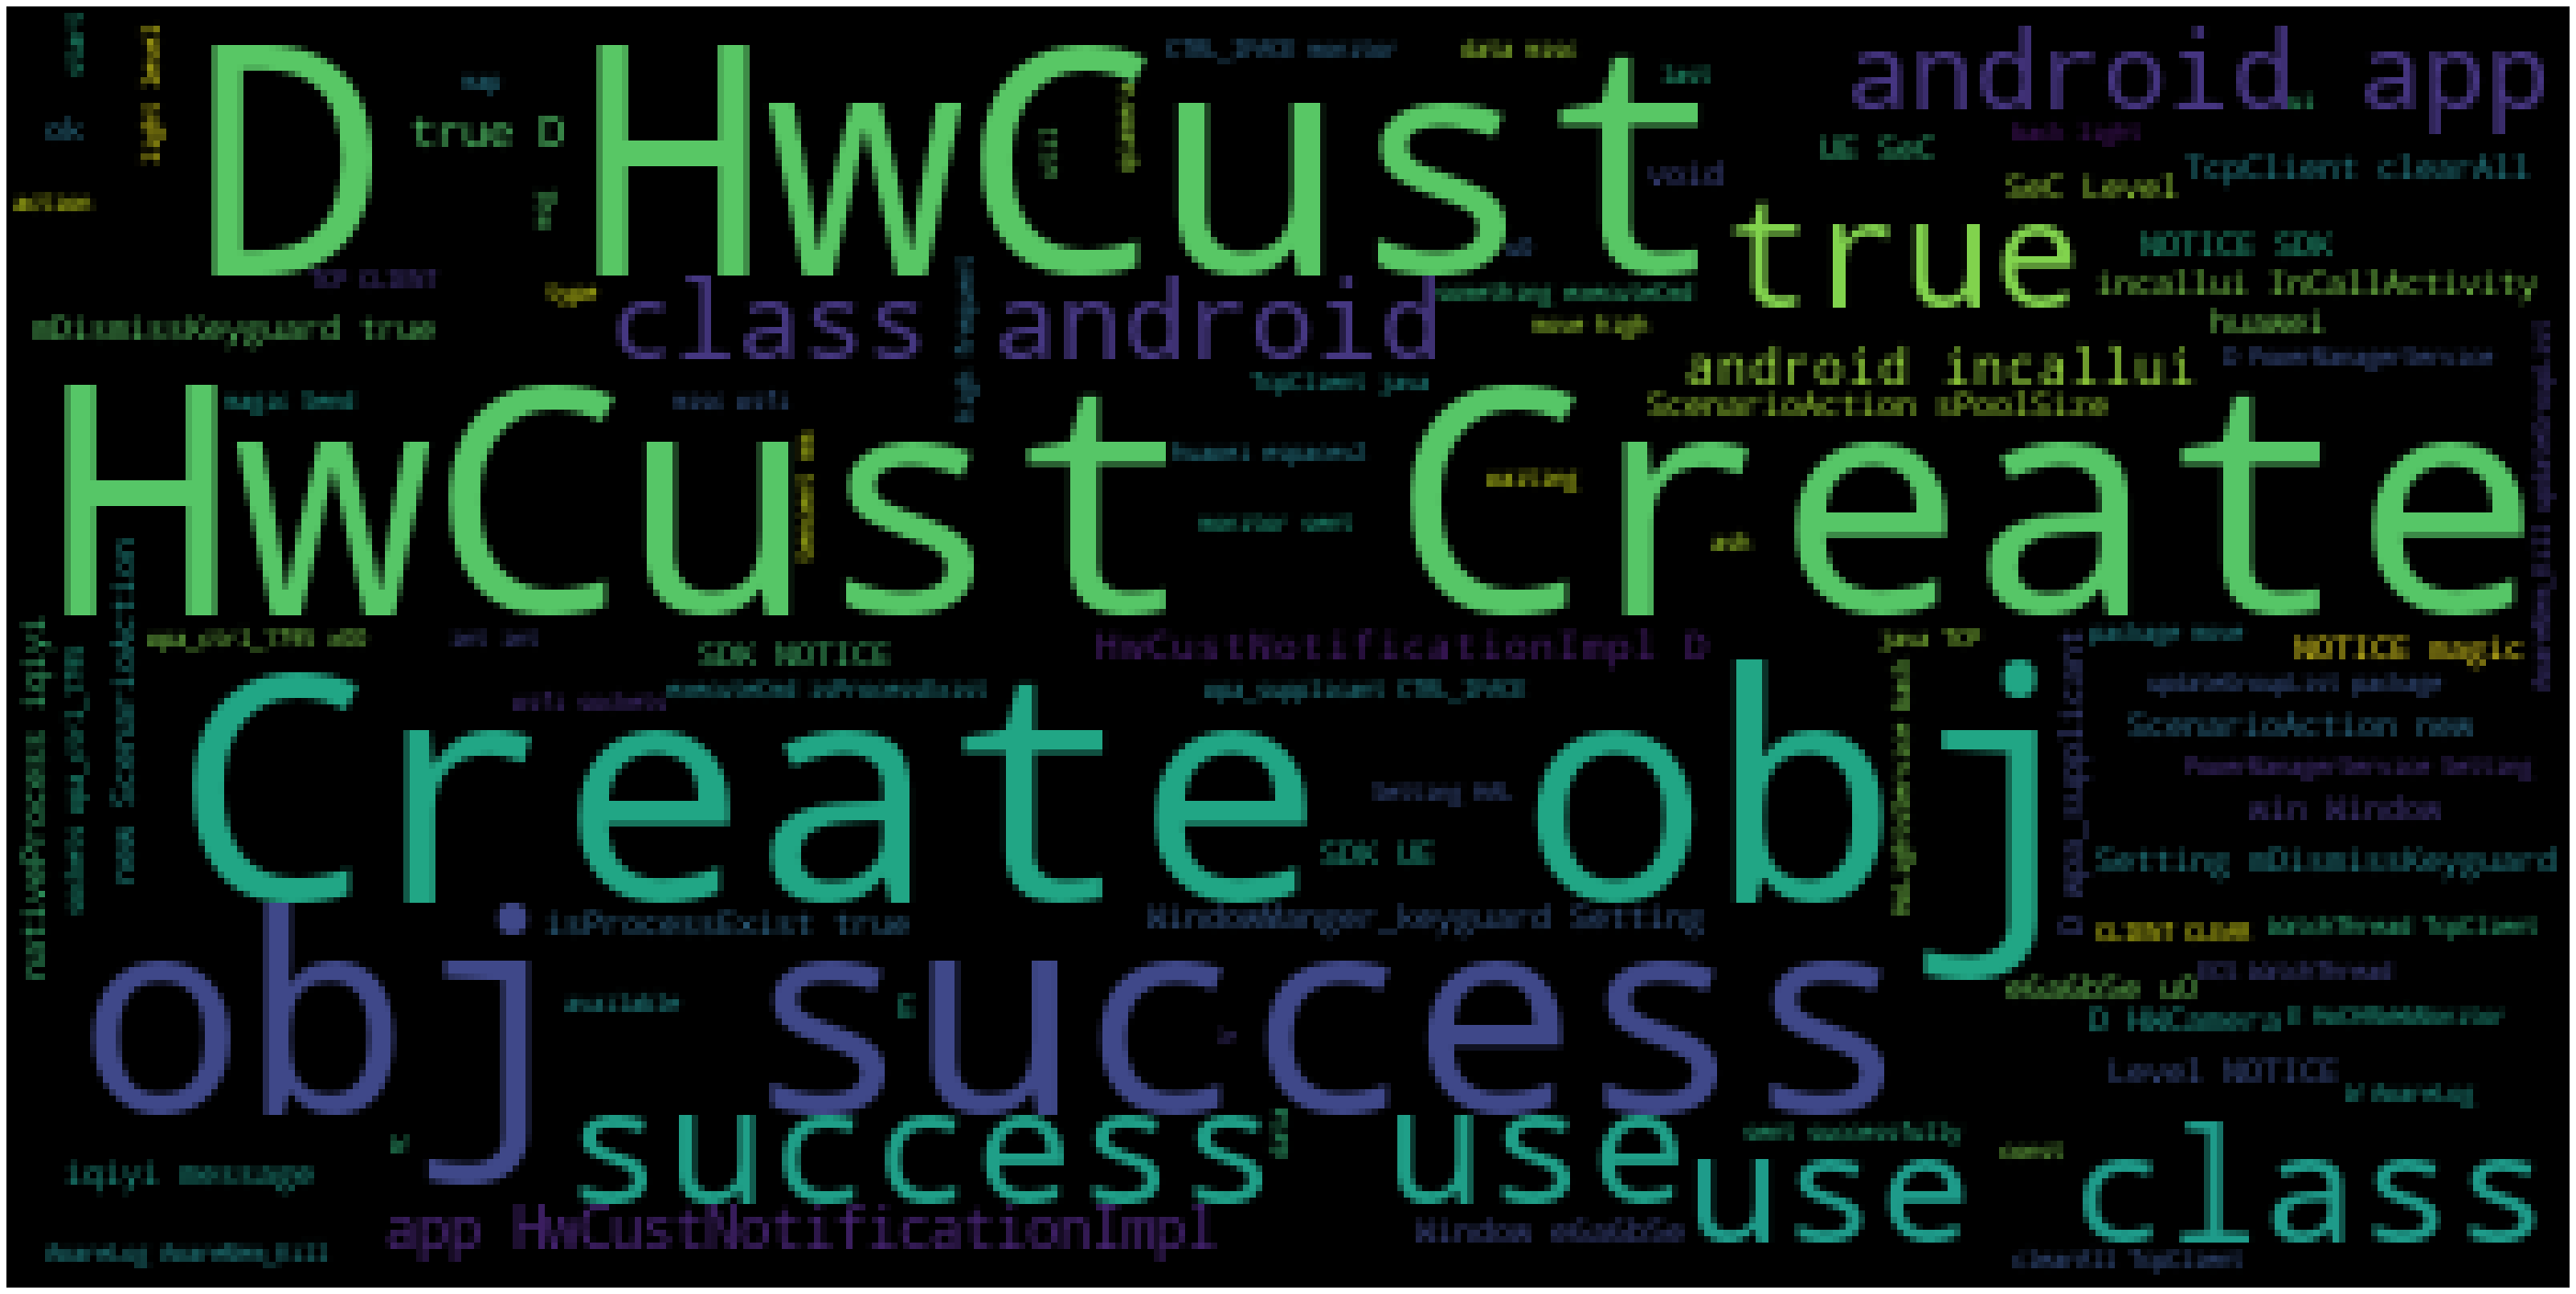

In [15]:
#Word cloud of POSITIVE Log entries
wc(data['Log_contents'][data.polarity>0.1],'black','Common Words' )

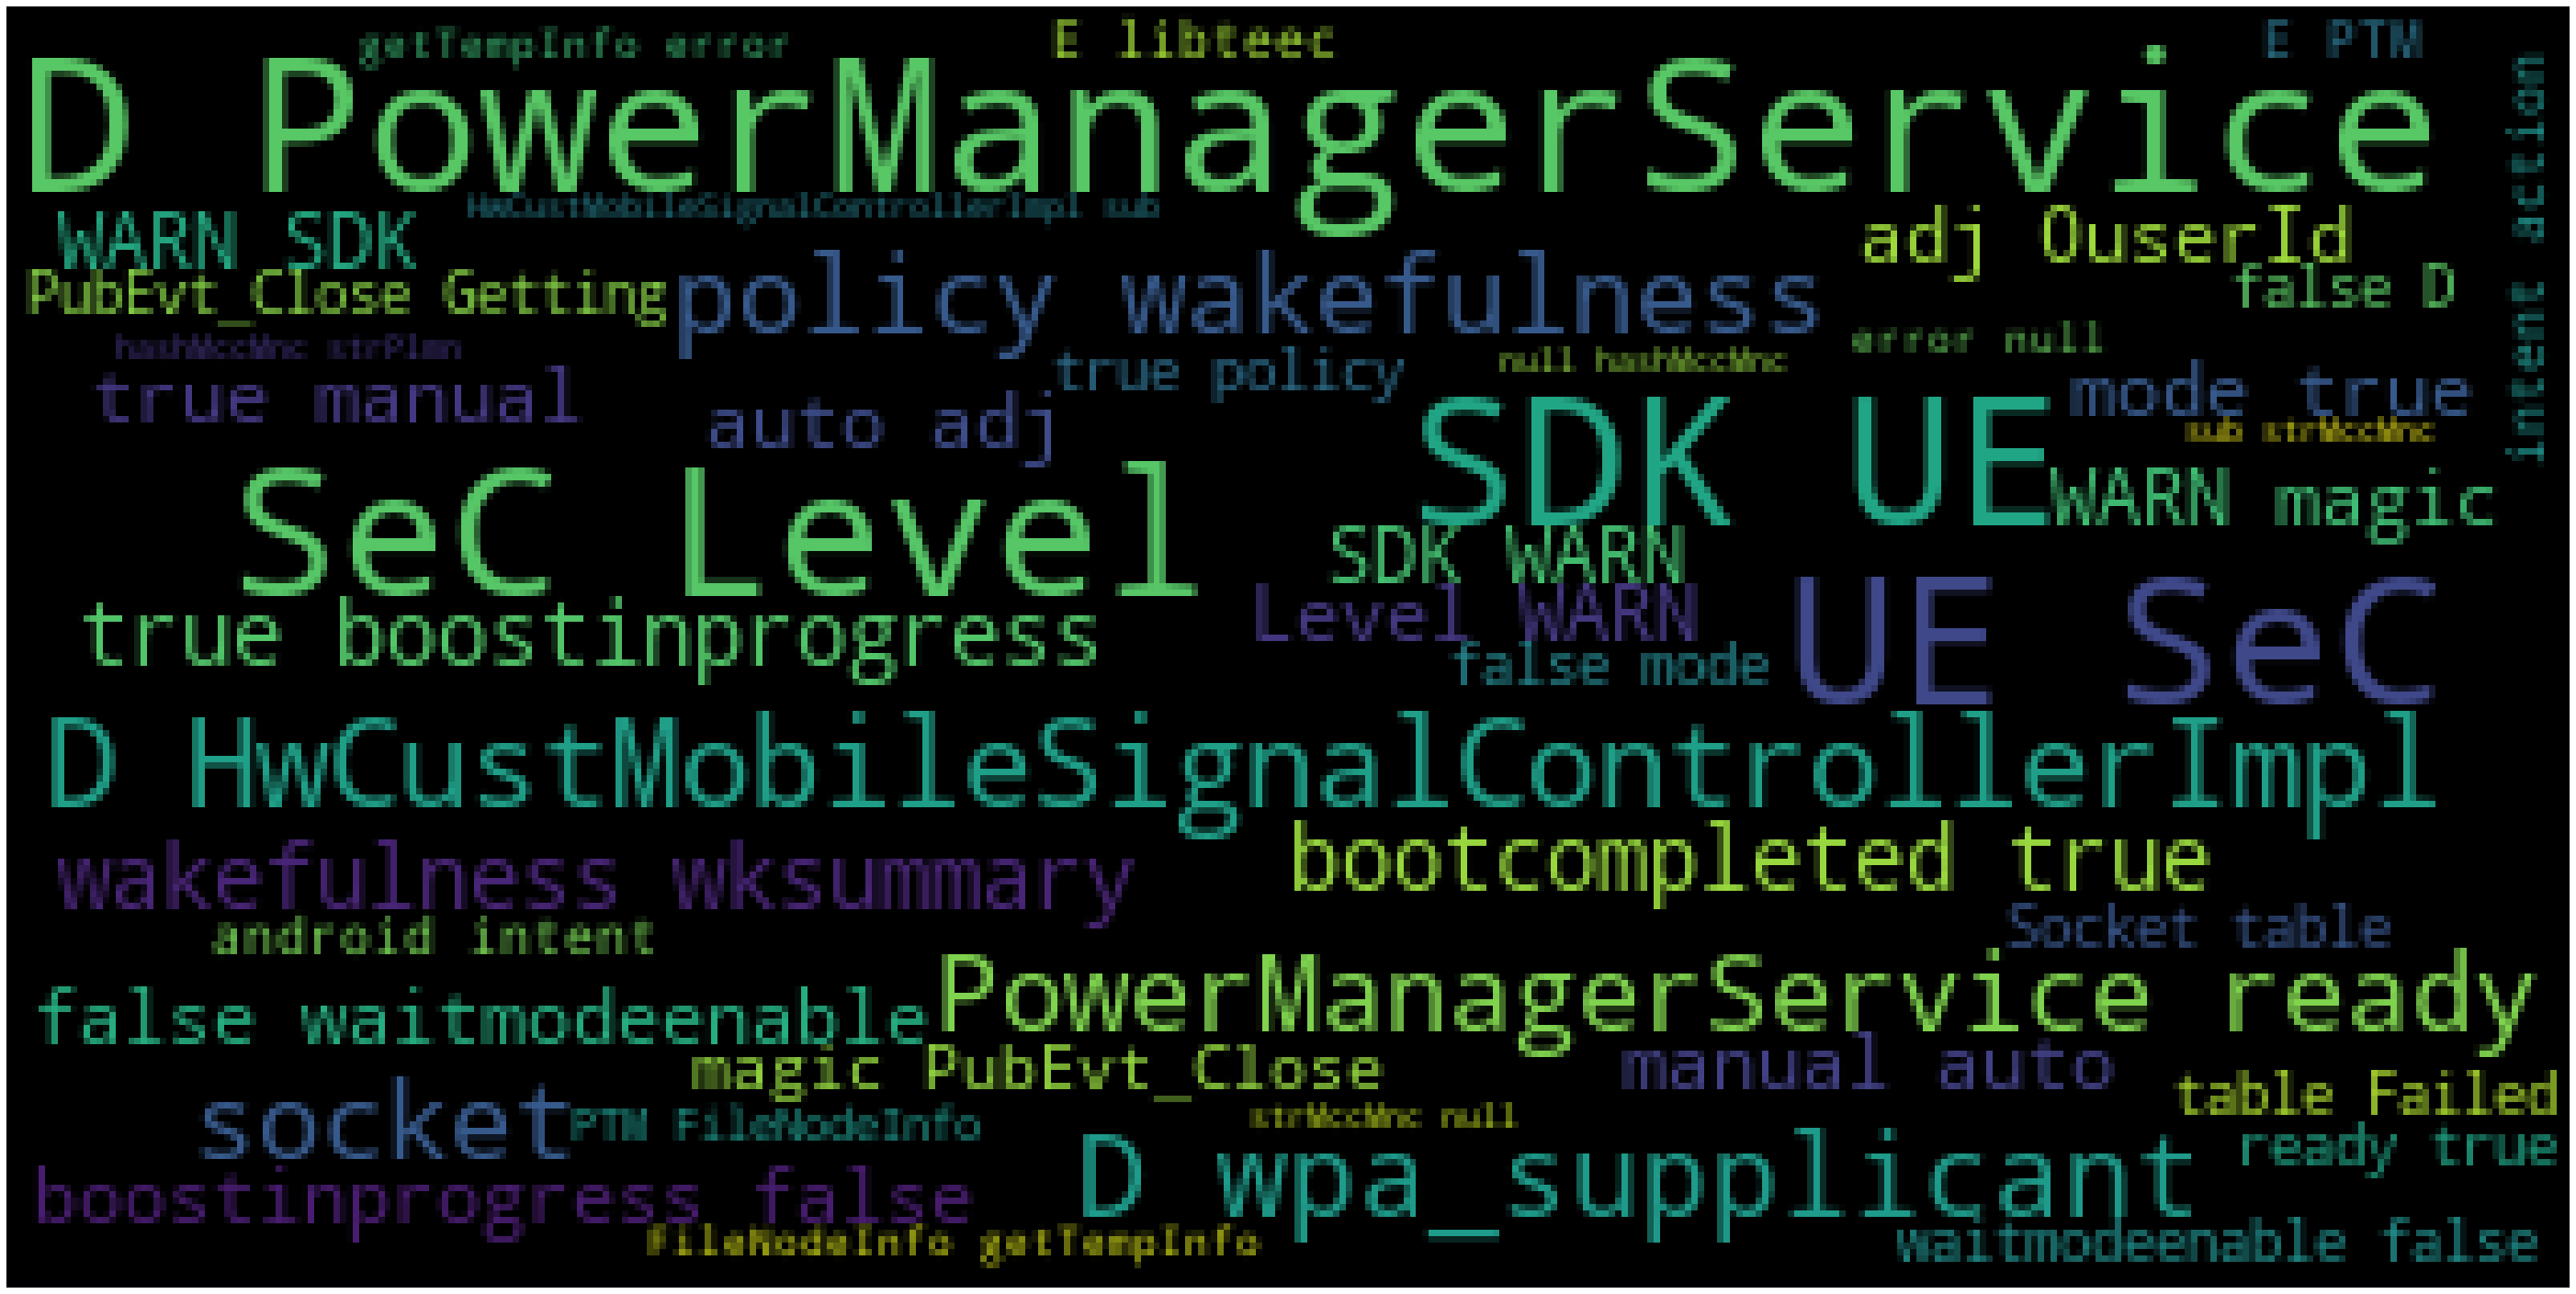

In [16]:
#Word cloud of NEGATIVE Log entries
wc(data['Log_contents'][data.polarity<0.4],'black','Common Words' )

<AxesSubplot:>

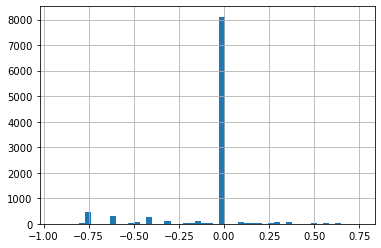

In [17]:
#Distribution of POLARITY
data.polarity.hist(bins=50)

<AxesSubplot:>

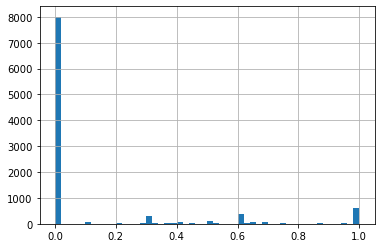

In [18]:
#Distribution of SUBJECTIVITY
data.subjectivity.hist(bins=50)

 0.0    8099
-1.0    1504
 1.0     397
Name: polarity, dtype: int64

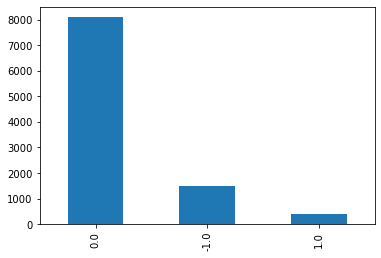

In [19]:
#Converting the polarity values from continuous to categorical
data['polarity'][data.polarity==0]= 0
data['polarity'][data.polarity > 0]= 1
data['polarity'][data.polarity < 0]= -1

#Calculating the count of Positive, Negative & Neutral comments
data.polarity.value_counts().plot.bar()
data.polarity.value_counts()

In [25]:
data.head(20)

,Log_contents,polarity,subjectivity
1304674,12-18 15:51:04.224 633 31870 I SDK : <2016-12-18 15:51:04> [WARN] SDK: UE-SeC 2016-12-18 15:51:4:224 Level[WARN] magic[3362781472 684]:PubEvt_Close Getting a socket[109] from the Socket-table Failed!,-1.0,0.3
392656,12-17 21:54:58.804 1795 1825 I WindowManger_keyguard: Screen turned off...,0.0,0.0
623942,12-17 23:46:09.365 633 31870 I SDK :,0.0,0.0
408806,12-17 21:58:52.749 633 31875 E SDK :,0.0,0.0
1443118,12-18 18:31:58.062 1795 1795 V NotificationService: disableEffects=null canInterrupt=false once update: false,-1.0,0.6
141051,12-17 20:27:01.852 2852 2852 I NotificationGroupManager: onEntryUpdated:0|com.huawei.health|10010|null|10099,0.0,0.0
333501,12-17 21:38:48.135 633 31868 E SDK : <2016-12-17 21:38:48> [ERR] SDK: UE-SeC 2016-12-17 21:38:48:135 Level[ERR] magic[3365677344 436]:libcSeekFile => fseek[22]:[-64][0][EA6046B0],0.0,0.0
95018,12-17 20:11:52.690 5224 5283 I Step_ExtendStepDataManager: 20002302|after compensate: cache step_5661,0.0,0.0
747147,12-18 07:41:58.973 4585 4599 I HiApp.ScheduleRepeatService: IntentService[RepeatingTaskManager]{8146} AppsUpdateTask execute EXECUTE,0.0,0.0
593680,"12-17 23:28:59.928 1795 2380 I PowerManager_screenOn: PowerManagerNotifier onUserActivity: event=2, uid=1000",0.0,0.0
